In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)

%matplotlib inline
sns.set()

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
plt.rcParams['figure.figsize'] = 15, 5

#NLP pipeline

In [3]:
import re
import nltk
import string
from bs4 import BeautifulSoup

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
import spacy

# Spacy fr core that will be used to perform lemmatisation
!python3 -m spacy download fr_core_news_md
import fr_core_news_md
nlp = fr_core_news_md.load(disable=['ner', 'parser'])
nlp.max_length = 1500000 #or whatever value > 1000000, as long as you don't run out of RAM


def clean_text(text):
    # remove all apostrophes that are not inside the words (''word limit apostrophe'')
    text = re.sub("\\s*'\\B|\\B'\\s*", " ", text)
    # drope html marks
    text = BeautifulSoup(text, "lxml").text
    # drope links
    text = re.sub(r'http\S+', '',text)
    # remove punctuations
    text.translate(str.maketrans('', '', string.punctuation))
    # remove numbers
    text = re.sub('[0-9]+', '', text)
    # replace ’ by '
    text = text.replace('’','\'')
    # remove spaces to the left and to the right
    text = text.strip()
    text = ' '.join(text.split())
    return text
    
# tokenize text
# def tokenize_text(text):
#     TOKEN_PATTERN = r'\s+'
#     regex_wt = nltk.RegexpTokenizer(pattern=TOKEN_PATTERN, gaps=True)
#     word_tokens = regex_wt.tokenize(text)
#     return word_tokens

def tokenize_lemmetize_text(text):
  """
    1. Use Spacy tokenizer to tokenize the sentence
    2. Lemmatize the sentence
  """
  token_list = nlp(str(text)) 
  lemma_list = [token.lemma_ for token in token_list if len(token.lemma_) > 2] 
  return lemma_list

def convert_to_lowercase(tokens):
    return [token.lower() for token in tokens if token.isalpha()]

def remove_stopwords(tokens):
    stopword_list = list(nlp.Defaults.stop_words)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    return filtered_tokens

def remove_short_tokens(tokens):
    return [token for token in tokens if len(token) > 3]

def nlp_pipeline(texts):
    clean_texts = []
    for text_i in texts:
        text_i = clean_text(text_i)
        text_i = tokenize_lemmetize_text(text_i)
        text_i = convert_to_lowercase(text_i)
        text_i = remove_stopwords(text_i)
        text_i = remove_short_tokens(text_i)
        clean_texts.append(text_i)
    return clean_texts

✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')


#Loading and checking the data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/reviews_hotels.csv')
df.head()                                        

,Unnamed: 0,hotel,review,rating
0,0,Appi Hotel,Appi hôtel à éviter absolument. Chambre pas fa...,1
1,1,Appi Hotel,Horrible ne jamais y mettre les pieds...a bani...,1
2,2,Appi Hotel,"Hotel bruyant, miteux qu'il faut fuir !!! Douc...",1
3,3,Appi Hotel,J’ai réservé plus de 4 mois à l’avance et lors...,1
4,4,Appi Hotel,Hôtel dont les chambres sont confortables et a...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53938 entries, 0 to 53937
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53938 non-null  int64 
 1   hotel       53938 non-null  object
 2   review      53938 non-null  object
 3   rating      53938 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.6+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53938.0,1815.934388,2477.160183,0.0,394.25,897.0,1814.0,11140.0
rating,53938.0,0.253773,0.435173,0.0,0.00,0.0,1.0,1.0


In [7]:
# Checkink if there is NA rows
df.isnull().sum()

Unnamed: 0    0
hotel         0
review        0
rating        0
dtype: int64

In [8]:
# Checkink if there is duplications
df.columns.duplicated()

array([False, False, False, False])

#Language detection

In [9]:
pip install langdetect

In [10]:
from langdetect import detect

for idx, row in df.iterrows():
  try:
    df.loc[idx, 'lang'] = detect(row['review'])
  except:
    print("This row throws and error:" + str(row['review']))

This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and error:…
This row throws and 

In [11]:
df.lang.value_counts()

fr    53858
en        5
ja        4
it        2
ru        1
pt        1
es        1
nl        1
sq        1
Name: lang, dtype: int64

In [12]:
df_fr = df[df.lang=='fr']

#Applying the Nlp pipeline

In [13]:
# utiliser la colonne des reviews
review = list(df.review)

# passer cette liste de reviews par mon pipeline nlp
clean_review = nlp_pipeline(review)

In [14]:
clean_review[0]

['appi',
 'hôtel',
 'éviter',
 'chambre',
 'faire',
 'heure',
 'soir',
 'parti',
 'journée',
 'explication',
 'personnel',
 'falloir',
 'préciser',
 'chambre',
 'devoir',
 'faire',
 'service',
 'petit',
 'déjeuner',
 'accrocher',
 'serviette',
 'bain',
 'verre',
 'brosse',
 'dent',
 'manqu',
 'cintre',
 'demande',
 'euro',
 'surréaliste',
 'déconseiller',
 'ennemi',
 'maurin',
 'séjour',
 'octobre']

In [15]:
# rejoindre les tokens pour former des chaînes de caractères qui serviront à 
# vectoriser aprés
clean_review_text = [' '.join(item) for item in clean_review]
clean_review_text[:10]

['appi hôtel éviter chambre faire heure soir parti journée explication personnel falloir préciser chambre devoir faire service petit déjeuner accrocher serviette bain verre brosse dent manqu cintre demande euro surréaliste déconseiller ennemi maurin séjour octobre',
 'horrible jamais mettre pied banir urgence chambre sale fenetre cassé ferme donner principal obliger dormir fenetre octobre responsable trouve normal nest present journee visible chambre euro nuit taxe restaurant petit déjeuner imeuble insalubre douche toilette palier chambre commune étage asseceur escalier pourrir chambre refaire journee fier photo reception renovée pouvoir voir photo prendre remboursement geste commercial revenir banir urgence fille',
 'hotel bruyant miteux falloir fuir douche commun hôtel difficile trouver prendre recourir point positif propre télé capte chaîne',
 'réserver mois avance arrive trajet heure voiture enfant hôtel complet hôtel miteux sale petit sombre éviter vraiment suicidaire',
 'hôtel ch

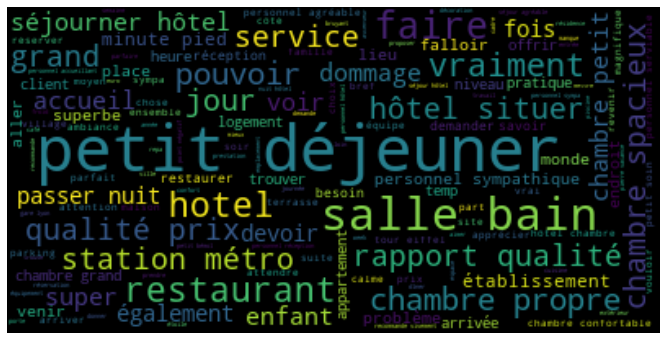

In [16]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join([item for item in clean_review_text])
# Generate a word cloud
wordcloud=WordCloud(contour_width=3,
                    contour_color='steelblue',
                    background_color="black").generate(long_string)
# Display the generated image:
plt.figure(figsize = (18,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

COUNT_VECTORIZER

In [17]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
# Initialise the count vectorizer 
count_vectorizer = CountVectorizer(stop_words=None,min_df=15, max_df=0.5)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(clean_review_text)
count_data.shape

(53938, 5288)

In [ ]:
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
      
# Tweak the two parameters below
number_topics = 20
number_words = 20
# Create and fit the LDA model
lda = LatentDirichletAllocation(n_components=number_topics,          # Number of topics
                                learning_method='online',   
                                batch_size=128,            # n docs in each learning iter
                                evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                n_jobs = -1,               # Use all available CPUs
                                doc_topic_prior=None,
                                learning_decay=0.7,
                                learning_offset=10.0,
                                max_doc_update_iter=100,
                                mean_change_tol=0.001,
                                perp_tol=0.1,
                                topic_word_prior=None,
                                total_samples=1000000.0, verbose=0
                                )
             
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

In [ ]:
pip install pyLDAvis

In [ ]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pyLDAvis

# # Preparing the visualization 
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared

TF-idf

- **Vectoriser le corpus**
Maintenant que nous avons le corpus nettoyé, nous pouvons utiliser TfidfVectorizer pour convertir le texte en format vectoriel.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=10, max_df=0.95,ngram_range=(1,1))

tfidf_feature_matrix = tfidf_vectorizer.fit_transform(clean_review_text)
tfidf_feature_matrix.shape

(53938, 6615)

In [20]:
vocabulary = set(tfidf_vectorizer.get_feature_names())
len(vocabulary)

6615

In [ ]:
vocabulary

In [21]:
pd.DataFrame(data=tfidf_feature_matrix.toarray(),
             columns=vocabulary)  # 1st row as the column names

,événement,allergie,metro,piétonne,positionnement,vraie,téléphérique,détestable,faiblesse,économique,festif,centaine,affiché,simple,paysage,arrivã,évasion,recette,anglaise,institution,facture,usure,grandeur,surchauffer,plan,wonderbox,fonds,bâtisse,vide,abandon,réveiller,série,résultat,recours,colline,iphone,acceuilli,méchant,urgence,convenir,...,innovant,compose,modérer,détenir,user,bidon,habit,frite,clean,assistance,prestigieux,adapter,cacahuète,inattendu,jeter,robinetterie,gras,réactif,sexy,stagiaire,sweet,plante,pouvoir,convenable,merite,mignardise,patère,stresser,exception,fonctionner,phase,habitation,délimiter,vert,guerlain,rooftop,prévenant,horrible,improbable,glisser
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.179520,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.261668,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30893,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138900,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [24]:
arr = np.array([1, 3, 2, 4, 5])
arr.argsort()[::-1]


array([4, 3, 1, 2, 0])

#Getting 5 highest features for each comment

In [25]:
feature_array = np.array(vocabulary)
# Trier dans l'ordre décroissant chaque commentaire
tfidf_sorting = np.argsort(tfidf_feature_matrix.toarray())[::-1]
tfidf_sorting.shape

(53938, 6615)

In [34]:
# obtenir les 5 premiers mots ayant le score tf-idf le plus élevé
n = 5
top_n = tfidf_sorting[:n].flatten()

In [38]:
# les indices des 5 features avec les scores tf-idf les plus élevé
list(top_n)

[0,
 4409,
 4408,
 4407,
 4406,
 4405,
 4404,
 4403,
 4402,
 4401,
 4400,
 4399,
 4398,
 4397,
 4396,
 4395,
 4394,
 4393,
 4392,
 4391,
 4390,
 4389,
 4410,
 4411,
 4412,
 4413,
 4436,
 4435,
 4434,
 4433,
 4432,
 4431,
 4430,
 4429,
 4428,
 4427,
 4388,
 4426,
 4424,
 4423,
 4422,
 4421,
 4419,
 4418,
 4417,
 4416,
 4415,
 4414,
 4425,
 4387,
 4386,
 4385,
 4358,
 4357,
 4356,
 4355,
 4354,
 4353,
 4352,
 4351,
 4350,
 4349,
 4359,
 4348,
 4346,
 4345,
 4344,
 4343,
 4342,
 4341,
 4340,
 4339,
 4338,
 4337,
 4347,
 4437,
 4360,
 4362,
 4384,
 4383,
 4382,
 4381,
 4380,
 4379,
 4378,
 4377,
 4376,
 4375,
 4361,
 4374,
 4372,
 4371,
 4370,
 4369,
 4368,
 4367,
 4366,
 4365,
 4364,
 4363,
 4373,
 4336,
 4438,
 4440,
 4513,
 4512,
 4511,
 4510,
 4509,
 4508,
 4507,
 4506,
 4505,
 4504,
 4503,
 4502,
 4501,
 4500,
 4499,
 4498,
 4497,
 4496,
 4495,
 4494,
 4493,
 4514,
 4515,
 4516,
 4517,
 4539,
 4538,
 4537,
 4536,
 4535,
 4534,
 4533,
 4532,
 4531,
 4530,
 4492,
 4529,
 4527,
 4526,
 4

In [53]:
vocabulary= list(vocabulary)
top_feature = []
for index in list(top_n):
  print(vocabulary[index])
  top_feature.append(vocabulary[index])

Streaming output truncated to the last 5000 lines.
geographiqu
aimã
montagne
allez
renommée
colle
denis
chalet
pitoyable
élever
brigitte
génération
genial
halloween
inestimable
game
tandis
rudimentaire
penser
familier
ficher
sympatique
faveur
attente
hôtel
activitée
semblant
répondant
autorisation
acteur
vérifiez
touristique
cartier
monument
union
tuilerie
ludique
localiser
final
piéger
fermé
prochaine
plongeon
geneve
fissure
charmante
viser
scooter
favorite
voiture
vacance
peintur
pizzer
avouer
usager
téléphone
tendanc
decouverte
coordonnée
record
appui
éteint
flotter
tonnelle
imprimante
archi
tiers
teste
zone
théo
velours
mucem
maximum
renverser
soigner
repos
évidence
humidité
pyjama
assurément
père
superficiel
visiblement
excité
sole
ordure
gourmet
exorbiter
écailler
phone
anne
détendre
quasiment
défiant
ensoleillé
batiment
lifting
epicerie
masse
testã
sejourné
compte
haussmann
prisé
debut
correspondre
obligatoirement
séparément
section
sensible
terrace
comptoir
hurler
également
éta

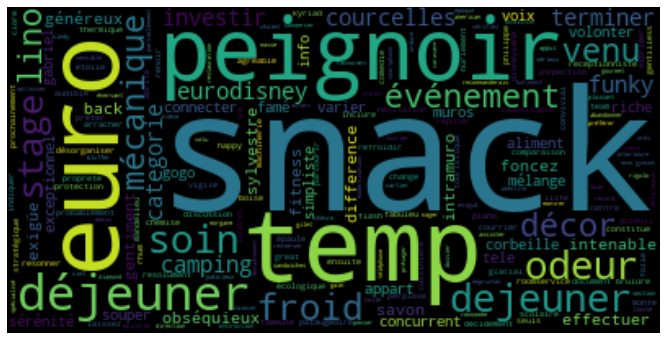

In [54]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join([item for item in top_feature])
# Generate a word cloud
wordcloud=WordCloud(contour_width=3,
                    contour_color='steelblue',
                    background_color="black").generate(long_string)
# Display the generated image:
plt.figure(figsize = (18,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()